# Description

Airbnb (short for Air Beds&Breakfast) is a marketplace that connects travelers with local property owners. For example, if you are a traveler and want to visit a city and you don't want to stay in a hotel or hostel, Airbnb gives you many choices from which you can easily book a room or an apartment.
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present more unique personalized way experiencing the world. This dataset describes the listing activity and metrics in New York City (NYC) for 2019

link:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
NYC_abnb= pd.read_csv("AB_NYC_2019.csv") #Displaying the content of the data
NYC_abnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [4]:
NYC_abnb.isnull().sum() #determing the null or empty columns

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#filling the unempty rows 
#for last review column fill with randomly generated values

cab_arr = NYC_abnb['last_review'][NYC_abnb['last_review'].notnull()].values  #extracts all values in the column that are not null
fill_cab = pd.Series(np.random.choice(cab_arr, 100070))
NYC_abnb['last_review'] = NYC_abnb['last_review'].fillna(fill_cab)

In [6]:
NYC_abnb['reviews_per_month'].fillna(NYC_abnb['reviews_per_month'].mean(), inplace = True) #fill reviews per month with the mean

NYC_abnb['host_name'] = NYC_abnb['host_name'].fillna(0) #fill host_name with 0

NYC_abnb['name'] =NYC_abnb['name'].fillna(0) #OR NYC_abnb['name'].fillna(value0, inplace=True) fill name colun with zero's (0)

NYC_abnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

  # Visualisation

Highest number of apartments

In [7]:
NYC_abnb.name.value_counts().head() #Top 5 

Hillside Hotel                  18
Home away from home             17
New york Multi-unit building    16
0                               16
Brooklyn Apartment              12
Name: name, dtype: int64

In [8]:
 #Creating new columns 
top5 = (pd.DataFrame(NYC_abnb.name.value_counts())).head()
top5.columns = ["Total Number"]
top5["nameL"] = top5.index
top5

,Total Number,nameL
Hillside Hotel,18,Hillside Hotel
Home away from home,17,Home away from home
New york Multi-unit building,16,New york Multi-unit building
0,16,0
Brooklyn Apartment,12,Brooklyn Apartment


Text(0.5, 1.0, 'HIGHEST NUMBER(TOP 5) OF APARTMENTS')

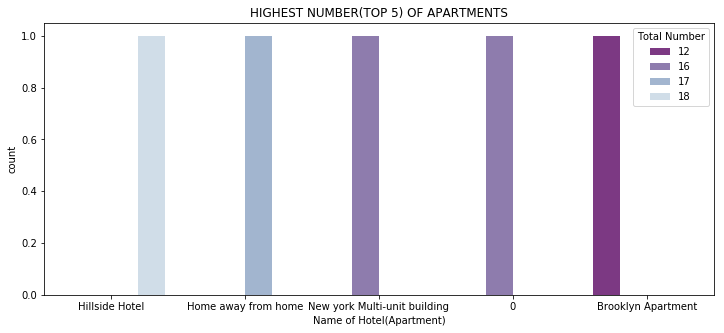

In [9]:
#visualisation using countplot
plt.figure(figsize=(12,5))
sns.countplot(data=top5, x = "nameL", hue= "Total Number" ,palette ="BuPu_r")
plt.xlabel("Name of Hotel(Apartment)")
#plt.xlabel
plt.title("HIGHEST NUMBER(TOP 5) OF APARTMENTS")

# DEDUCTION:
From the plot above, it is seen that "Hillside hotel" has the highest count of 18 i.e it is found in 18 different locations in Briarwood and Jamiaca Neighbourhood....
next is "Home away from home" which is spread across 17 different locations...
"0" in 17 different location...
"New York Multi UnitBuilding" in 16 different locations...
lastly, "Brooklyn Apartment" in 12 differnt locations.

Neighbourhood with the highest number of apartments

In [10]:
#the highest hotel count is Hillside hotel, Thus, what neighbourhood is it located?
print(NYC_abnb[NYC_abnb["name"]== "Hillside Hotel"]["neighbourhood"] )


#Creating new columns
top5_neigh = (pd.DataFrame(NYC_abnb.neighbourhood.value_counts())).head()
top5_neigh.columns = ["Total Number"]
top5_neigh["Neighbourhood"] = top5_neigh.index
print(top5_neigh)


24152    Briarwood
24607      Jamaica
26734      Jamaica
26752      Jamaica
26753      Jamaica
26889      Jamaica
26891      Jamaica
26892      Jamaica
26893      Jamaica
26894    Briarwood
26895    Briarwood
26896      Jamaica
26897      Jamaica
26898      Jamaica
26899      Jamaica
26900    Briarwood
26901    Briarwood
26902    Briarwood
Name: neighbourhood, dtype: object
                    Total Number       Neighbourhood
Williamsburg                3920        Williamsburg
Bedford-Stuyvesant          3714  Bedford-Stuyvesant
Harlem                      2658              Harlem
Bushwick                    2465            Bushwick
Upper West Side             1971     Upper West Side


Text(0.5, 1.0, 'TOP 5 NEIGHBOURHOOD WITH THE HIGHEST APARTMENTS')

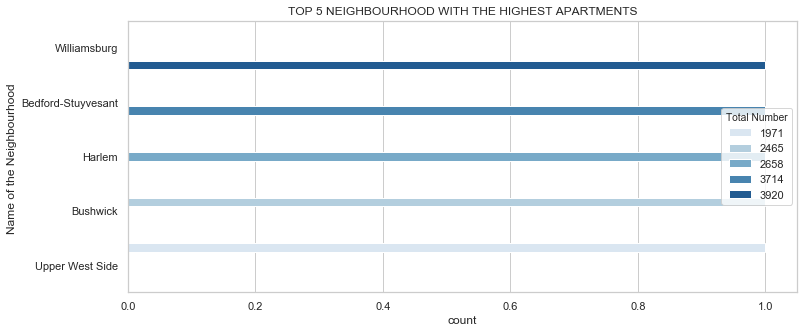

In [11]:
sns.set(style= "whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(data=top5_neigh, y = "Neighbourhood", hue= "Total Number" ,palette ="Blues")
plt.ylabel("Name of the Neighbourhood ")
plt.title("TOP 5 NEIGHBOURHOOD WITH THE HIGHEST APARTMENTS") 

# Deduction
 The neighbourhood a customer is sure to find an Airbnb is at Upper West Side which has 3,920 apartments...
 next is Bushwick with total number of 3,714 apartments,
 Harlem with 2658 apartments...
 Bedford-Stuyvesant with 2465 apartments and lastly...
 Williamsburg with 1971 these are the top 5 neighbourhoods with the highest number of apartment or apartment listing.

In [12]:
NYC_abnb['number_of_reviews'].max()

629

In [13]:
 #details of the host with the highest number of reviews
NYC_abnb[NYC_abnb['number_of_reviews']==629]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


Expensive and Cheap Apartments

In [14]:
#expensive and less expensive rooms
NYC_abnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Assuming 
Expensive rooms costs 5,000 and above
Average cost ranges from 1,000 to 4999 and 
Cheap rooms costs 0 to 999


In [15]:
w =NYC_abnb['price'].apply(lambda u:'Expensive(Above 5,000)'if u >=5001  else("Average(1000-5000)" if u <= 1000 and u >=5000 else "Cheap(0-999)"  ))
#CREATING A NEW COLUMN
NYC_abnb["Price Range"] = w 
NYC_abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Cheap(0-999)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Cheap(0-999)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-02,1.373221,1,365,Cheap(0-999)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap(0-999)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Cheap(0-999)


In [16]:
NYC_abnb["Price Range"].value_counts()

Cheap(0-999)              48875
Expensive(Above 5,000)       20
Name: Price Range, dtype: int64

In [17]:
NYC_abnb[NYC_abnb['Price Range']=='Expensive(Above 5,000)']['name'].value_counts() #For Expensive rooms/apartments

Luxury townhouse Greenwich Village                    1
1-BR Lincoln Center                                   1
Park Avenue Mansion by (Hidden by Airbnb)             1
Apartment New York \nHell’s Kitchens                  1
Furnished room in Astoria apartment                   1
70' Luxury MotorYacht on the Hudson                   1
East 72nd Townhouse by (Hidden by Airbnb)             1
UWS 1BR w/backyard + block from CP                    1
Luxury 1 bedroom apt. -stunning Manhattan views       1
SuperBowl Penthouse Loft 3,000 sqft                   1
Spanish Harlem Apt                                    1
3000 sq ft daylight photo studio                      1
Luxury TriBeCa Apartment at an amazing price          1
SUPER BOWL Brooklyn Duplex Apt!!                      1
Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho     1
Quiet, Clean, Lit @ LES & Chinatown                   1
Gem of east Flatbush                                  1
2br - The Heart of NYC: Manhattans Lower East Si

Text(0.5, 1.0, 'EXPENSIVE APARTMENTS')

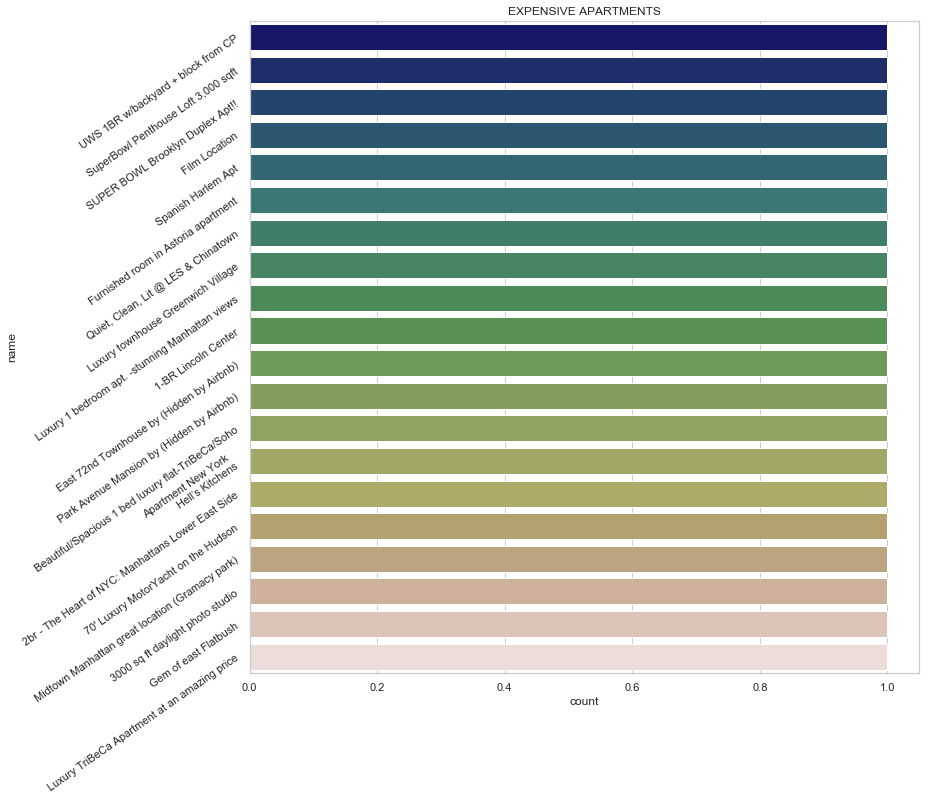

In [18]:
plt.figure(figsize=(12,12))
plt.yticks(rotation=35)
sns.countplot(y = NYC_abnb[NYC_abnb['Price Range']=='Expensive(Above 5,000)']['name'], palette='gist_earth' )
plt.title("EXPENSIVE APARTMENTS") 

# DEDUCTION 
From the analysis, 20 hotels cost 5000 and above.
While 48875 cost between 0 to 999.

Type of rooms in the respective neighbourhood 

In [19]:
NYC_abnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

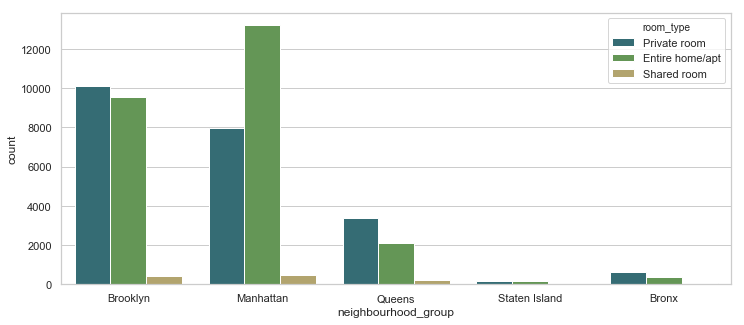

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(data=NYC_abnb, x= "neighbourhood_group", hue= 'room_type', palette='gist_earth')

# DEDUCTION
We can clearly see what types of room could be found in each neighbourhood group.
With the highest private room type in Brooklyn and the lowest in Staten Island,
The highest "Entire room and apartment in Manhattan and the lowest in Staten Island ...
The highest Shared room in Manhattan, none in Staten Island and Bronx.

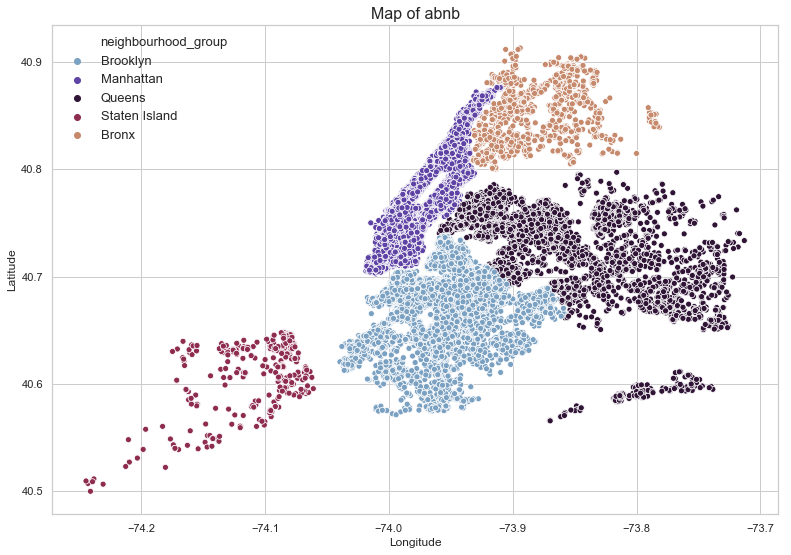

In [42]:
plt.figure(figsize=(13,9))
a=sns.scatterplot(data=NYC_abnb, x="longitude" , y="latitude",hue= "neighbourhood_group", palette='twilight')
plt.title("Map of abnb", fontsize=16)
plt.legend(frameon=False, fontsize=13)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.set(style= "whitegrid")


# Deduction
The above shows the geographical distribution of listings.
    

Type of rooms avaliable

In [22]:
 NYC_abnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

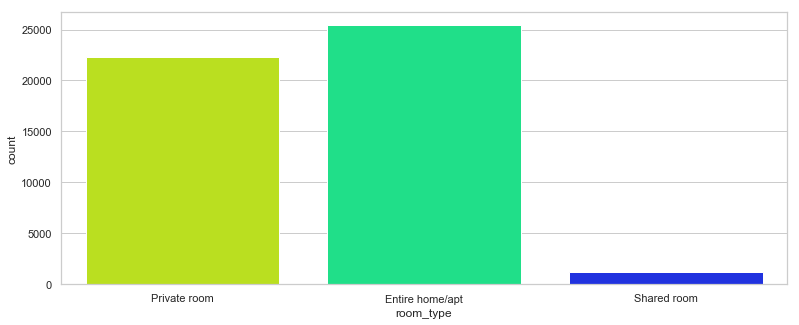

In [43]:
plt.figure(figsize=(13,5))
sns.countplot(data =NYC_abnb, x='room_type', palette ="gist_rainbow")

Checking for correlation

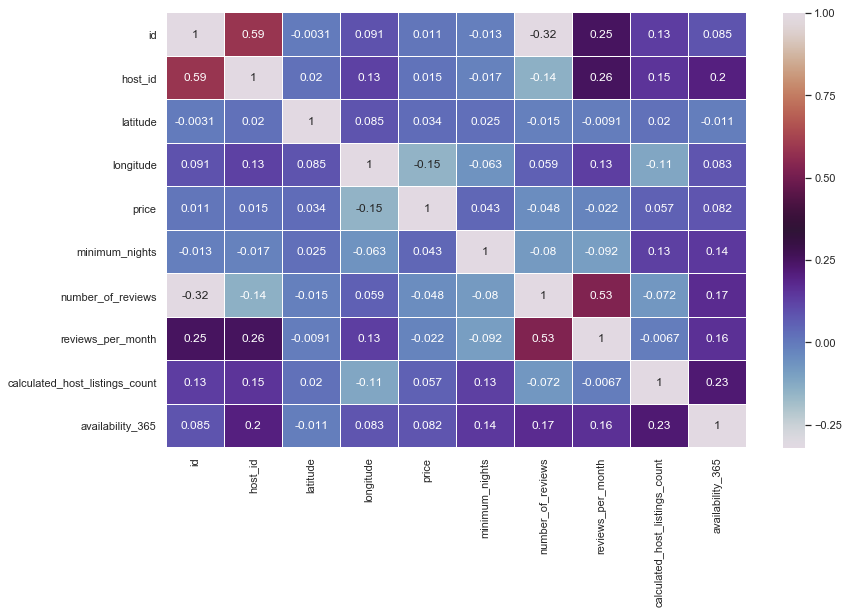

In [41]:
plt.figure(figsize=(13,8))
sns.heatmap(NYC_abnb.corr(), annot = True,linewidths=0.1, cmap= "twilight")

 # Deduction
How correlation works;
This shows the relationship between each columns.
when corrrelation shows a negative value, it simply means the affected columns would have a negative effect on the result's accuracy(for ML).
for example; There is a -0.05 correlation coefficient between price and reviews. This corerelation is very weak/poor, hence cant be considered relevant.

The prices of apartment in each neighbourhood group and the respective apartment(name of the apartment)

In [25]:
NYC_abnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [26]:
#prices in neighbourhoods
dataR = pd.DataFrame(NYC_abnb.groupby (['neighbourhood_group','neighbourhood'])['price'].mean())
dataR.reset_index(inplace= True)

bronx = (dataR[dataR['neighbourhood_group']=='Bronx']).sort_values(by ='price', ascending = False).head()
Manhattan = (dataR[dataR['neighbourhood_group']=='Manhattan']).sort_values(by ='price', ascending = False).head()
Brooklyn = (dataR[dataR['neighbourhood_group']=='Brooklyn']).sort_values(by ='price', ascending = False).head()
Queens = (dataR[dataR['neighbourhood_group']=='Queens']).sort_values(by ='price', ascending = False).head()
Staten_Island = (dataR[dataR['neighbourhood_group']=='Staten Island']).sort_values(by ='price', ascending = False).head()


neighs = [bronx,Manhattan,Brooklyn,Queens,Staten_Island]
Titles = ["BR", "B", "M","Q","S"]

#OR

print(bronx)
print()
print(Manhattan)
print()
print(Brooklyn)
print()
print(Queens)
print()
print(Staten_Island)

   neighbourhood_group   neighbourhood       price
34               Bronx       Riverdale  442.090909
5                Bronx     City Island  173.000000
37               Bronx  Spuyten Duyvil  154.750000
12               Bronx     Eastchester  141.692308
40               Bronx       Unionport  137.142857

    neighbourhood_group      neighbourhood       price
121           Manhattan            Tribeca  490.638418
95            Manhattan  Battery Park City  367.557143
102           Manhattan  Flatiron District  341.925000
115           Manhattan               NoHo  295.717949
118           Manhattan               SoHo  287.103352

   neighbourhood_group     neighbourhood       price
88            Brooklyn          Sea Gate  487.857143
62            Brooklyn       Cobble Hill  211.929293
56            Brooklyn  Brooklyn Heights  209.064935
67            Brooklyn             DUMBO  196.305556
92            Brooklyn      Vinegar Hill  187.176471

    neighbourhood_group    neighbourhood   

Text(0.5, 1.0, 'Staten_Island')

<Figure size 936x648 with 0 Axes>

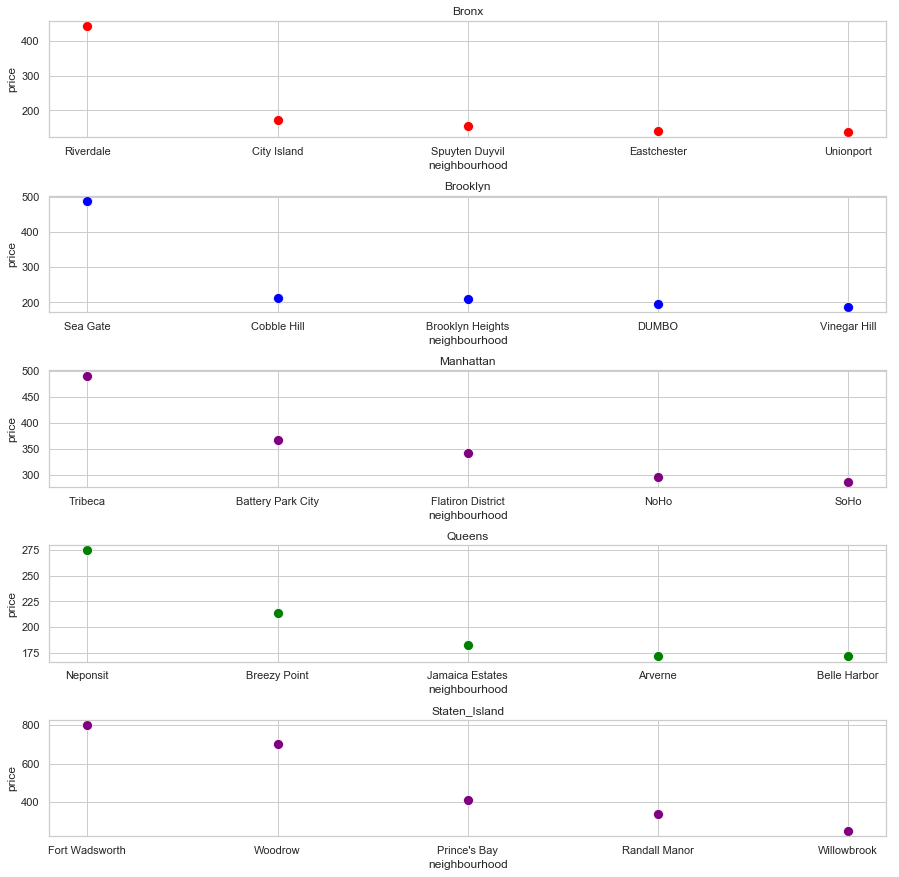

In [27]:
plt.figure(figsize=(13,9))
fig, axs=plt.subplots(5, figsize=(15,15), gridspec_kw ={"hspace":0.5 ,"wspace":0})

sns.scatterplot(data=bronx, x="neighbourhood", y="price",ax=axs[0], color="red",s=100)

sns.scatterplot(data=Brooklyn, x="neighbourhood", y="price",ax=axs[1], color="blue",s=100)

sns.scatterplot(data=Manhattan, x="neighbourhood", y="price",ax=axs[2], color="purple",s=100)

sns.scatterplot(data=Queens, x="neighbourhood", y="price", ax=axs[3],color="green",s=100)

sns.scatterplot(data=Staten_Island , x="neighbourhood", y="price",ax=axs[4], color="purple",s=100)  


axs[0].set_title("Bronx")
axs[1].set_title("Brooklyn")
axs[2].set_title("Manhattan")
axs[3].set_title("Queens")
axs[4].set_title("Staten_Island")

# Conclusion
The deductions show the result of the analysis.


NEXT POST CONTAINS THE PREDICTION